In [4]:
# Montar unidad drive
# from google.colab import drive
# drive.mount('/content/drive')


# TFM - Modelos de Propensión para Campañas Comerciales

**Autor:** Grupo 4

---

## 1. Carga de librerías


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


---

## 2. Carga del dataset


In [6]:
df = pd.read_csv("./Data/customer_shopping_data_v5.csv", delimiter=';')


---

## 3. Análisis exploratorio



---

### 3.1 Análisis de columnas


En este primer análisis realizaremos una exploración de las diferentes columnas que tiene nuestro dataset, mostrando el tipo que tiene cada una, y además veremos si este algun nulo.

In [7]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas generales
print("\nEstadísticas descriptivas:")
print(df.describe())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499965 entries, 0 to 499964
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Factura           499965 non-null  object 
 1   ID_Cliente        499965 non-null  object 
 2   Categoría         499965 non-null  object 
 3   Cantidad          499965 non-null  int64  
 4   Importe           499965 non-null  float64
 5   Método de Pago    499965 non-null  object 
 6   Fecha_Factura     499965 non-null  object 
 7   Centro_Comercial  499965 non-null  object 
 8   Canal             499965 non-null  object 
 9   Género            499965 non-null  object 
 10  Edad              499965 non-null  int64  
 11  Zona              499965 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 45.8+ MB

Valores nulos por columna:
Factura             0
ID_Cliente          0
Categoría           0
Cantidad            0
Impo

---

### 3.2 Análisis con gráficos

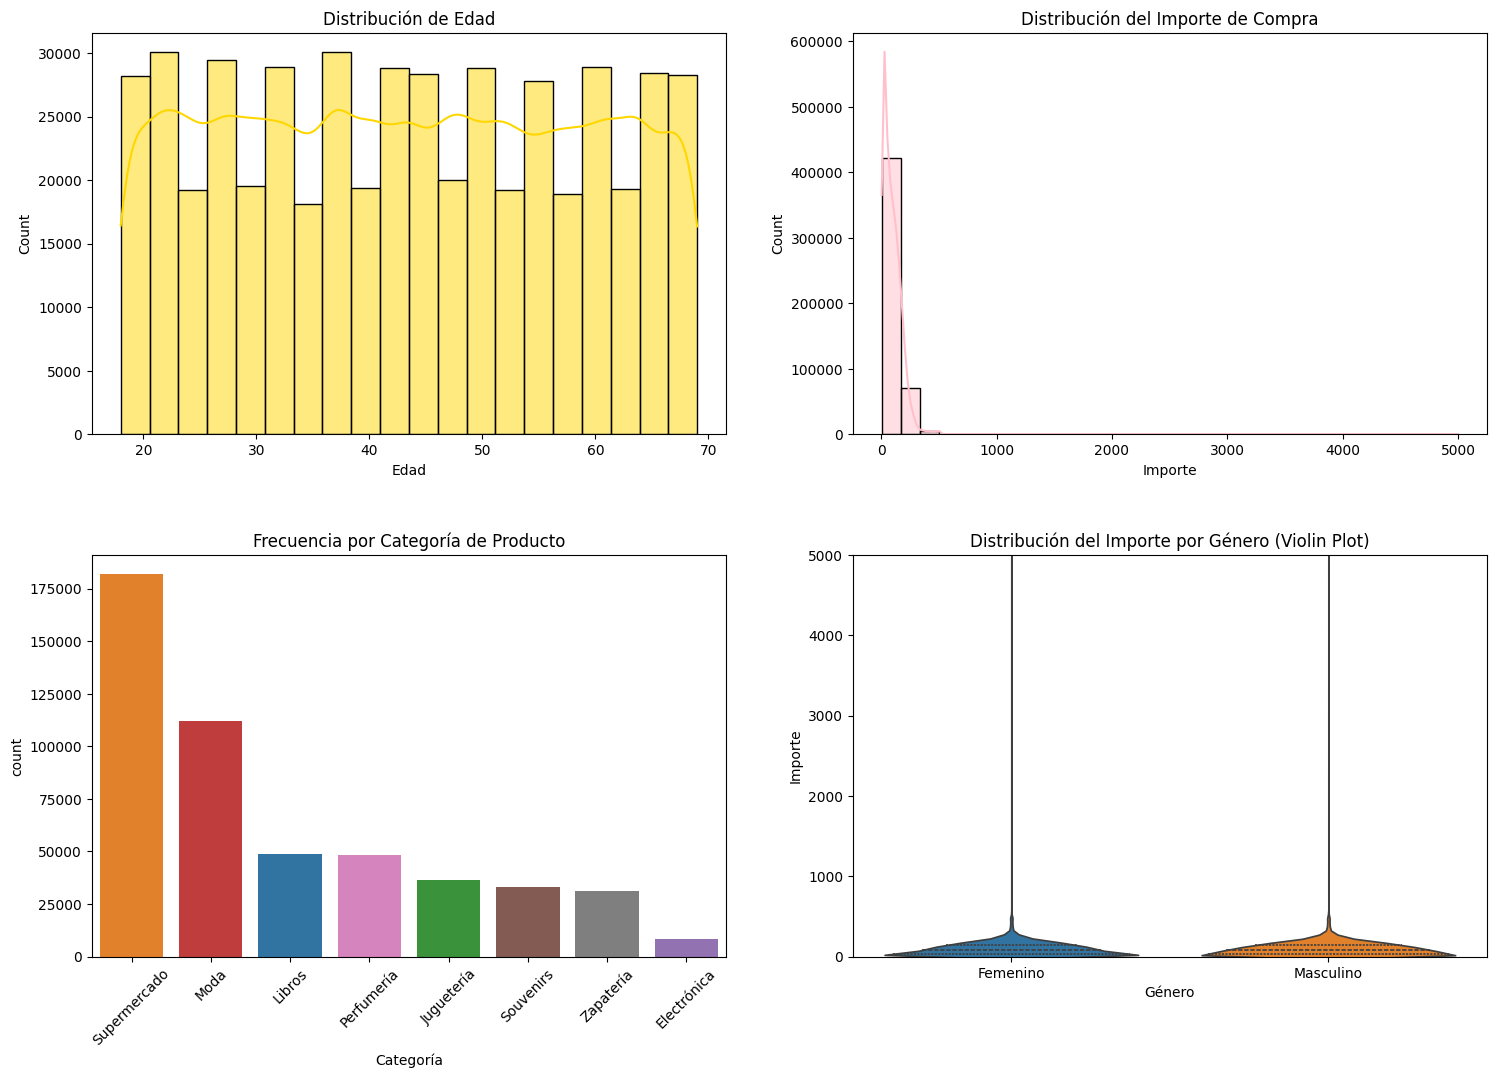

In [8]:
palette = {0: 'gold', 1: 'skyblue', 2: 'lightgreen', 3: 'lightgrey'}

plt.figure(figsize=(18, 12)) 
# Visualización: Distribución de Edad
plt.subplot(2, 2, 1)
sns.histplot(df["Edad"], bins=20, kde=True, color='gold')
plt.title("Distribución de Edad")

# Visualización: Distribución del Importe
plt.subplot(2, 2, 2)
sns.histplot(df["Importe"], bins=30, kde=True, color='pink')
plt.title("Distribución del Importe de Compra")

# Conteo por Categoría
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="Categoría", order=df["Categoría"].value_counts().index, hue=df["Categoría"])
plt.title("Frecuencia por Categoría de Producto")
plt.xticks(rotation=45)

# Violin plot con límite
plt.subplot(2, 2, 4)
sns.violinplot(x="Género", y="Importe", data=df, inner="quartile",  hue=df["Género"])
plt.title("Distribución del Importe por Género (Violin Plot)")
plt.ylim(0, 5000)

plt.subplots_adjust(hspace=0.3)
plt.show()

### Análisis Exploratorio de los Datos

A continuación, se detallan los puntos principales obtenidos a partir de las visualizaciones:

#### 1. Distribución de Edad
- La distribución de edades es bastante uniforme, con una leve concentración entre los 30 y 40 años.
- La mayoría de los clientes se encuentran entre los 20 y 70 años.
- No se observan outliers ni una clara asimetría en la distribución.

#### 2. Distribución del Importe de Compra
- El importe de compra presenta una distribución fuertemente sesgada a la derecha (positivamente sesgada).
- La gran mayoría de las compras están por debajo de los 1000 unidades monetarias.
- Existen algunos valores extremos que podrían considerarse outliers y que elevan considerablemente el rango del eje X.

#### 3. Frecuencia por Categoría de Producto
- Las categorías más frecuentes son:
  - **Moda** (mayoritaria con diferencia)
  - **Perfumería** y **Supermercado** en segundo plano
- Categorías como **Libros**, **Souvenirs** y **Electrónica** tienen una frecuencia significativamente menor.
- Este gráfico sugiere qué segmentos podrían ser más estratégicos para futuras campañas de marketing.

#### 4. Distribución del Importe por Género (Violin Plot)
- La distribución del importe de compra es similar entre hombres y mujeres.
- Ambos géneros presentan una alta concentración de compras de bajo importe, con algunos valores atípicos de importe alto.
- No se aprecian diferencias sustanciales en los patrones de gasto entre géneros, aunque podrían analizarse más en detalle con estadísticas descriptivas o tests de hipótesis.

---

**Conclusión**:  
Este análisis permite entender mejor los perfiles de los clientes, los patrones de compra y la distribución por categorías. Estos puntos pueden orientar el diseño de campañas personalizadas y mejorar la segmentación en modelos predictivos.


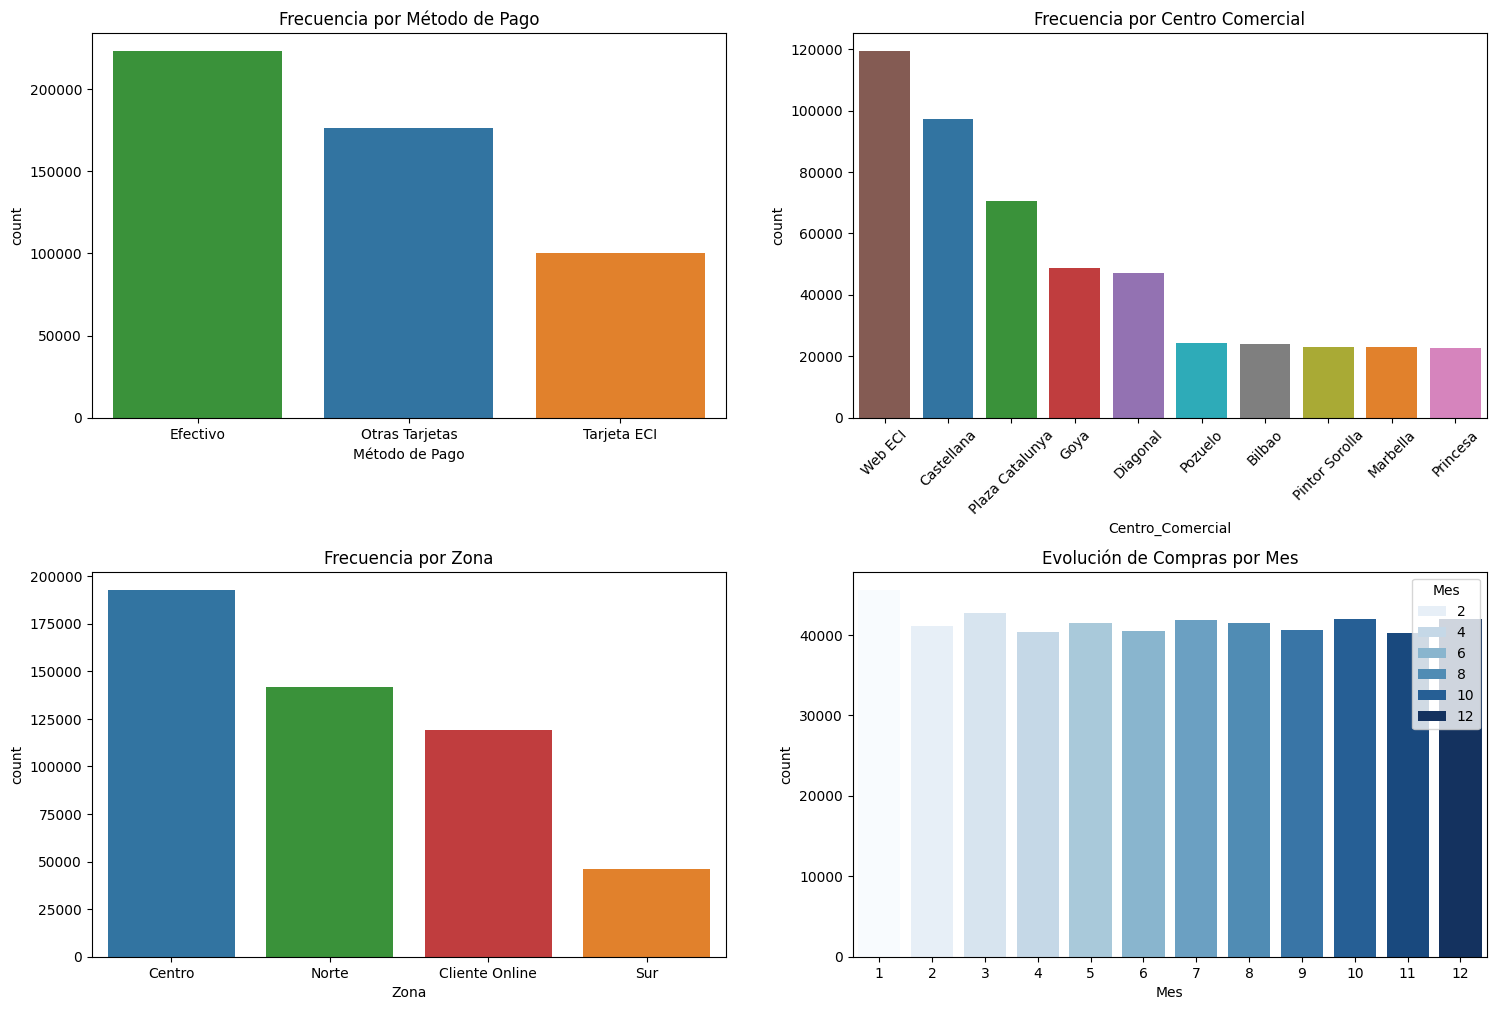

In [9]:
plt.figure(figsize=(18, 12)) 

# Conteo por Método de Pago
plt.subplot(2, 2, 1)
sns.countplot(data=df, x="Método de Pago", order=df["Método de Pago"].value_counts().index, hue=df["Método de Pago"])
plt.title("Frecuencia por Método de Pago")

# Conteo por Centro Comercial
plt.subplot(2, 2, 2)
sns.countplot(data=df, x="Centro_Comercial", order=df["Centro_Comercial"].value_counts().index, hue=df["Centro_Comercial"])
plt.title("Frecuencia por Centro Comercial")
plt.xticks(rotation=45)

# Conteo por Zona
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="Zona", order=df["Zona"].value_counts().index, hue=df["Zona"])
plt.title("Frecuencia por Zona")

# Evolución mensual de compras
df["Fecha_Factura"] = pd.to_datetime(df['Fecha_Factura'], format="%d/%m/%Y")
df["Mes"] = df["Fecha_Factura"].dt.month
plt.subplot(2, 2, 4)
sns.countplot(data=df, x="Mes", palette="Blues", hue=df["Mes"])
plt.title("Evolución de Compras por Mes")

plt.subplots_adjust(hspace=0.4)
plt.show()

### Análisis Exploratorio Complementario

#### 1. Frecuencia por Método de Pago
- **Efectivo** es el método de pago más común, seguido por **Otras Tarjetas**.
- La **Tarjeta ECI**, aunque menos utilizada, representa una proporción relevante, lo que puede indicar fidelización por parte de ciertos clientes.

#### 2. Frecuencia por Centro Comercial
- La **Web ECI** lidera en número de compras, lo que resalta la importancia del canal online.
- **Castellana** y **Plaza Catalunya** son los centros físicos con mayor número de compras, lo que puede reflejar su tamaño o afluencia.
- Centros como **Princesa**, **Marbella** o **Pintor Sorolla** presentan menor frecuencia de compra.

#### 3. Frecuencia por Zona
- La zona **Centro** lidera en número de compras, seguida de **Norte** y **Cliente Online**.
- La zona **Sur** presenta la menor cantidad de compras, lo que podría indicar menor presencia de centros o menor actividad comercial en esa área.

#### 4. Evolución de Compras por Mes
- La cantidad de compras se mantiene relativamente estable durante el año, con una ligera disminución hacia el final del mismo.
- No se aprecian picos destacados estacionales, aunque hay una leve caída en los últimos meses (noviembre y diciembre), lo cual resulta curioso y podría requerir mayor análisis si se esperaban picos por campañas navideñas.

---

**Conclusión**:  
Estos gráficos aportan información valiosa sobre el comportamiento de los clientes según método de pago, ubicación, y temporalidad. Destaca el auge del canal online y la importancia del efectivo como medio de pago. Esta información es fundamental para diseñar estrategias por canal y zona geográfica.



---

## 4. Análisis adicional por zona


Importe medio por zona:
Zona
Centro            110.567877
Cliente Online    109.432727
Sur               108.787222
Norte             107.429803
Name: Importe, dtype: float64
Categoría más frecuente por zona:
              Zona     Categoría  Cuenta
6           Centro  Supermercado   69967
22           Norte  Supermercado   51514
14  Cliente Online  Supermercado   43571
30             Sur  Supermercado   16931


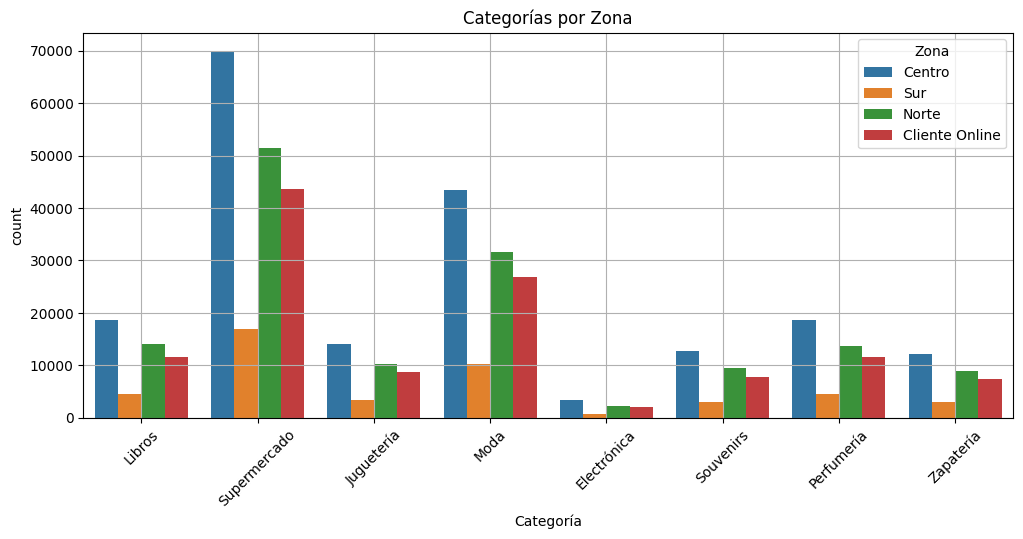

In [10]:
# Explicación: Ahora vamos a explorar cómo varía el comportamiento de los clientes según la zona.
# Esto nos ayudará a entender si la ubicación geográfica tiene influencia en el tipo de compra.

# 1. Importe medio por zona
print("Importe medio por zona:")
print(df.groupby("Zona")["Importe"].mean().sort_values(ascending=False))

# 2. Categoría más comprada por zona
print("Categoría más frecuente por zona:")
categoria_zona = df.groupby(["Zona", "Categoría"]).size().reset_index(name="Cuenta")
mas_comprada = categoria_zona.sort_values("Cuenta", ascending=False).drop_duplicates(subset="Zona")
print(mas_comprada)

# 3. Visualización de categorías más populares por zona
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Categoría", hue="Zona")
plt.title("Categorías por Zona")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Análisis de Categorías por Zona

El gráfico muestra la distribución de compras por categoría de producto según la zona geográfica.

#### 1. Moda
- Es la categoría más popular en todas las zonas.
- Destaca fuertemente en la zona **Centro**, seguida por **Norte** y **Cliente Online**.
- En la zona **Sur**, aunque sigue siendo la más vendida, el volumen es notablemente más bajo.

#### 2. Perfumería y Supermercado
- Ambas categorías tienen un comportamiento muy similar.
- Tienen una presencia importante en la zona **Centro**, seguida de **Norte** y **Cliente Online**.
- En la zona **Sur** su participación es bastante menor, lo que sugiere una baja demanda o menor disponibilidad.

#### 3. Zapatería y Juguetería
- Estas categorías tienen también una alta representación en la zona **Centro**, siendo la segunda o tercera categoría más popular.
- **Cliente Online** mantiene una participación notable, indicando un interés digital por estas categorías.
- El **Sur** nuevamente tiene los menores volúmenes.

#### 4. Libros, Electrónica y Souvenirs
- Son las categorías con menor volumen total.
- La distribución sigue el mismo patrón: **Centro** domina, seguido por **Norte** y **Cliente Online**, dejando al **Sur** en último lugar.
- **Libros** y **Souvenirs** presentan una proporción considerable en **Cliente Online**, lo que puede indicar una preferencia por la compra digital de estos productos.

---

**Conclusión**:  
La zona **Centro** es claramente la de mayor actividad comercial en todas las categorías. La **zona Sur** presenta un bajo volumen en todos los productos, lo que podría deberse a factores como menor densidad de tiendas, menor población objetivo o bajo poder adquisitivo. El canal **Cliente Online** tiene una buena representación en categorías como **Moda**, **Zapatería** y **Libros**, lo que puede orientar futuras campañas específicas para ecommerce.
